<a href="https://colab.research.google.com/github/SJinLee/XAI2023/blob/main/4_sliding_window.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2

In [2]:
blue_color = (255,0,0)
green_color = (0,255,0)
red_color = (0,0,255)
white_color = (255,255,255)

In [3]:
img = np.zeros((384,384,3),np.uint8)

In [4]:
img = cv2.circle(img,(50,50),50,blue_color,5)

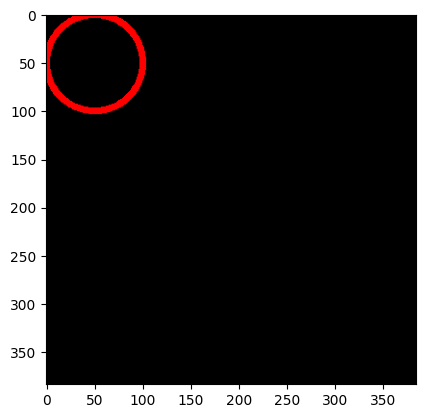

In [6]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [31]:
image = np.zeros((64,64,3),np.uint8)
image = cv2.circle(image,(32,32),27,(255,255,255),3)

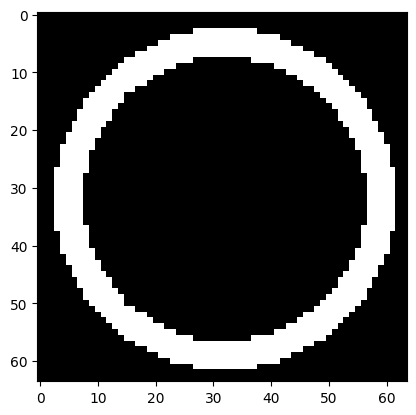

In [32]:
plt.imshow(image)

In [33]:
import tensorflow as tf
kernel = tf.constant([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1],
], dtype=tf.float32)


In [34]:
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])

In [35]:
image_filter = tf.nn.conv2d(
    input=image[:,:,:,0:1],
    filters=kernel,
    # we'll talk about these two in the next lesson!
    strides=1,
    padding='SAME'
)

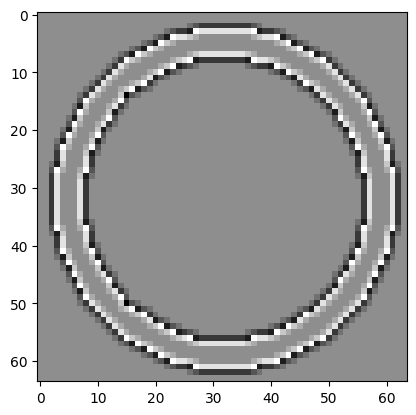

In [36]:
plt.imshow(image_filter[0,:,:,:],cmap='gray')

In [37]:
image_detect = tf.nn.relu(image_filter)

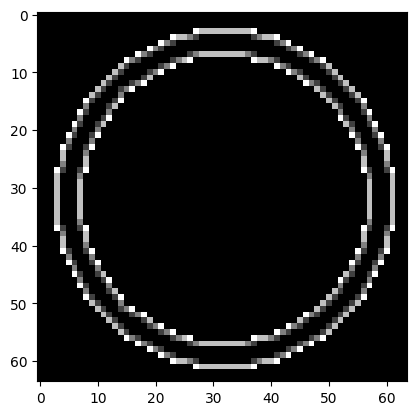

In [38]:
plt.imshow(image_detect[0,:,:,:],cmap='gray')

In [39]:
image_condense = tf.nn.pool(
    input=image_detect, # image in the Detect step above
    window_shape=(2, 2),
    pooling_type='MAX',
    # we'll see what these do in the next lesson!
    strides=(2, 2),
    padding='SAME',
)

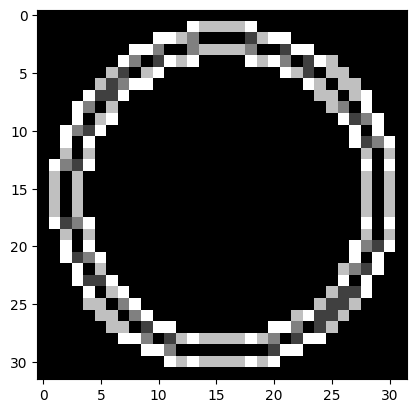

In [40]:
plt.imshow(image_condense[0,:,:,:],cmap='gray')